In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [7]:
X = df.drop('Species', axis=1)
y = df['Species']

In [4]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [11]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

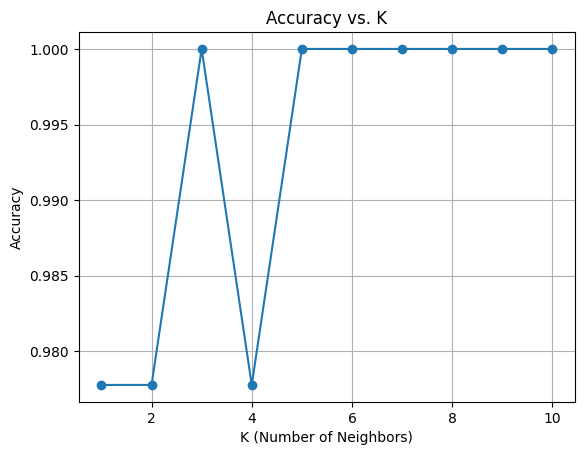

In [12]:
import matplotlib.pyplot as plt

k_values = list(range(1, 11))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Accuracy: 1.0


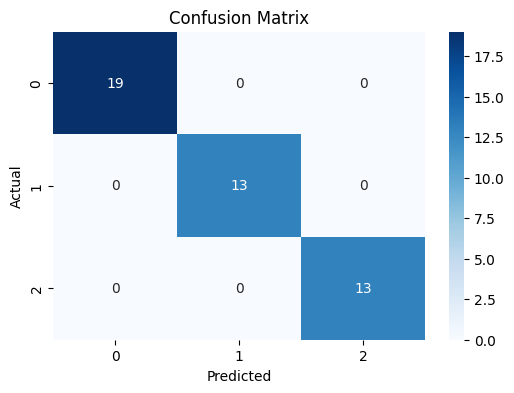

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


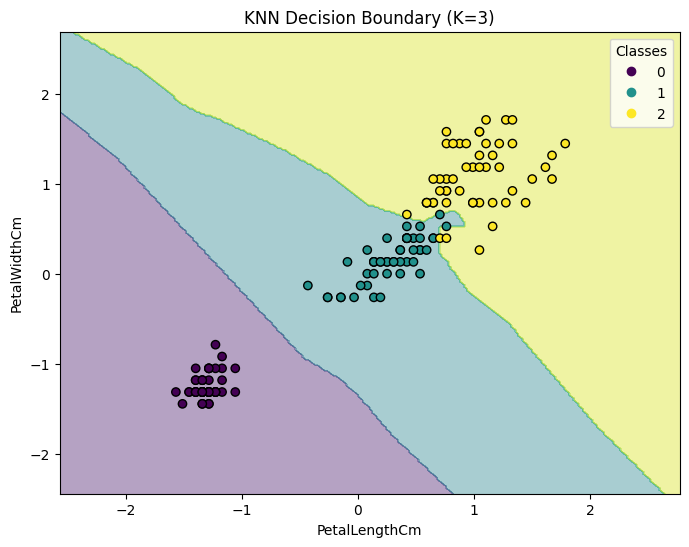

In [16]:
# Select only 2 features from the original data for simplicity
features = ['petal length (cm)', 'petal width (cm)']
X_simple = df[features]
y_simple = df['Species']

# Normalize the selected features
scaler = StandardScaler()
X_simple_scaled = scaler.fit_transform(X_simple)

# Use the same train/test split as before, but with the simplified features
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple_scaled, y_simple, test_size=0.3, random_state=42)

# Fit KNN again with the simplified data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_simple, y_train_simple)

# Meshgrid for plotting decision boundaries
h = 0.02
x_min, x_max = X_simple_scaled[:, 0].min() - 1, X_simple_scaled[:, 0].max() + 1
y_min, y_max = X_simple_scaled[:, 1].min() - 1, X_simple_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
scatter = plt.scatter(X_simple_scaled[:, 0], X_simple_scaled[:, 1], c=y_simple, edgecolor='k')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('KNN Decision Boundary (K=3)')

# Create a legend with the class labels
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()